# Library needed

In [3]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt

# Excel file needed
https://www.kaggle.com/datasets/fedesoriano/heart-failure-prediction

In [4]:
heart_df = pd.read_csv('heart_train.csv')

In [5]:
heart_df.describe(include= 'all')

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
count,918.000000,918,918,918.000000,918.000000,918.000000,918,918.000000,918,918.000000,918,918.000000
unique,NaN,2,4,NaN,NaN,NaN,3,NaN,2,NaN,3,NaN
top,NaN,M,ASY,NaN,NaN,NaN,Normal,NaN,N,NaN,Flat,NaN
freq,NaN,725,496,NaN,NaN,NaN,552,NaN,547,NaN,460,NaN
mean,53.510893,NaN,NaN,132.396514,198.799564,0.233115,NaN,136.809368,NaN,0.887364,NaN,0.553377
std,9.432617,NaN,NaN,18.514154,109.384145,0.423046,NaN,25.460334,NaN,1.066570,NaN,0.497414
min,28.000000,NaN,NaN,0.000000,0.000000,0.000000,NaN,60.000000,NaN,-2.600000,NaN,0.000000
25%,47.000000,NaN,NaN,120.000000,173.250000,0.000000,NaN,120.000000,NaN,0.000000,NaN,0.000000
50%,54.000000,NaN,NaN,130.000000,223.000000,0.000000,NaN,138.000000,NaN,0.600000,NaN,1.000000
75%,60.000000,NaN,NaN,140.000000,267.000000,0.000000,NaN,156.000000,NaN,1.500000,NaN,1.000000


In [6]:
heart_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


Attribute Information  
- Age: age of the patient [years]  
- Sex: sex of the patient [M: Male, F: Female]  
- ChestPainType: chest pain type [TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic]  
- RestingBP: resting blood pressure [mm Hg]  
- Cholesterol: serum cholesterol [mm/dl]  
- FastingBS: fasting blood sugar [1: if FastingBS > 120 mg/dl, 0: otherwise]  
- RestingECG: resting electrocardiogram results [Normal: Normal, ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria]  
- MaxHR: maximum heart rate achieved [Numeric value between 60 and 202]  
- ExerciseAngina: exercise-induced angina [Y: Yes, N: No]  
- Oldpeak: oldpeak = ST [Numeric value measured in depression]  
- ST_Slope: the slope of the peak exercise ST segment [Up: upsloping, Flat: flat, Down: downsloping]  
- HeartDisease: output class [1: heart disease, 0: Normal]  

# Clean Dataset

In [7]:
# Create a copy of the Dataset
Heart_df_clean = heart_df.copy()

# Rename "#" to "ID" of Pokemon
Heart_df_clean.rename(columns = {'#': 'ID'}, inplace = True)

# Convert all Variable Names to UPPERCASE
Heart_df_clean.columns = Heart_df_clean.columns.str.upper()

# Remove all spaces and dots from Variable Names
Heart_df_clean.columns = Heart_df_clean.columns.str.replace(".","")
Heart_df_clean.columns = Heart_df_clean.columns.str.replace(" ","_")

# Print the Variable Information to check
Heart_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   AGE             918 non-null    int64  
 1   SEX             918 non-null    object 
 2   CHESTPAINTYPE   918 non-null    object 
 3   RESTINGBP       918 non-null    int64  
 4   CHOLESTEROL     918 non-null    int64  
 5   FASTINGBS       918 non-null    int64  
 6   RESTINGECG      918 non-null    object 
 7   MAXHR           918 non-null    int64  
 8   EXERCISEANGINA  918 non-null    object 
 9   OLDPEAK         918 non-null    float64
 10  ST_SLOPE        918 non-null    object 
 11  HEARTDISEASE    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


C:\Users\LCP\AppData\Local\Temp\ipykernel_31720\1996328438.py:11: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  Heart_df_clean.columns = Heart_df_clean.columns.str.replace(".","")


In [8]:
# Numeric
heart_AGE = pd.DataFrame(Heart_df_clean['AGE'])
heart_RBP = pd.DataFrame(Heart_df_clean['RESTINGBP'])
heart_CLS = pd.DataFrame(Heart_df_clean['CHOLESTEROL'])
heart_MAXHR = pd.DataFrame(Heart_df_clean['MAXHR'])
heart_HD = pd.DataFrame(Heart_df_clean['HEARTDISEASE'])

#catogrical
heart_SEX = pd.DataFrame(Heart_df_clean['SEX'])
heart_EA = pd.DataFrame(Heart_df_clean['EXERCISEANGINA'])
heart_CPT = pd.DataFrame(Heart_df_clean['CHESTPAINTYPE'])


# Reconfig type

In [9]:
heartC_HD = heart_HD
heartC_HD.replace(to_replace=[1,0],value = ['Y','N'],inplace = True )

In [10]:
heartC_HD.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 1 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   HEARTDISEASE  918 non-null    object
dtypes: object(1)
memory usage: 7.3+ KB


# Visualisation

<AxesSubplot:>

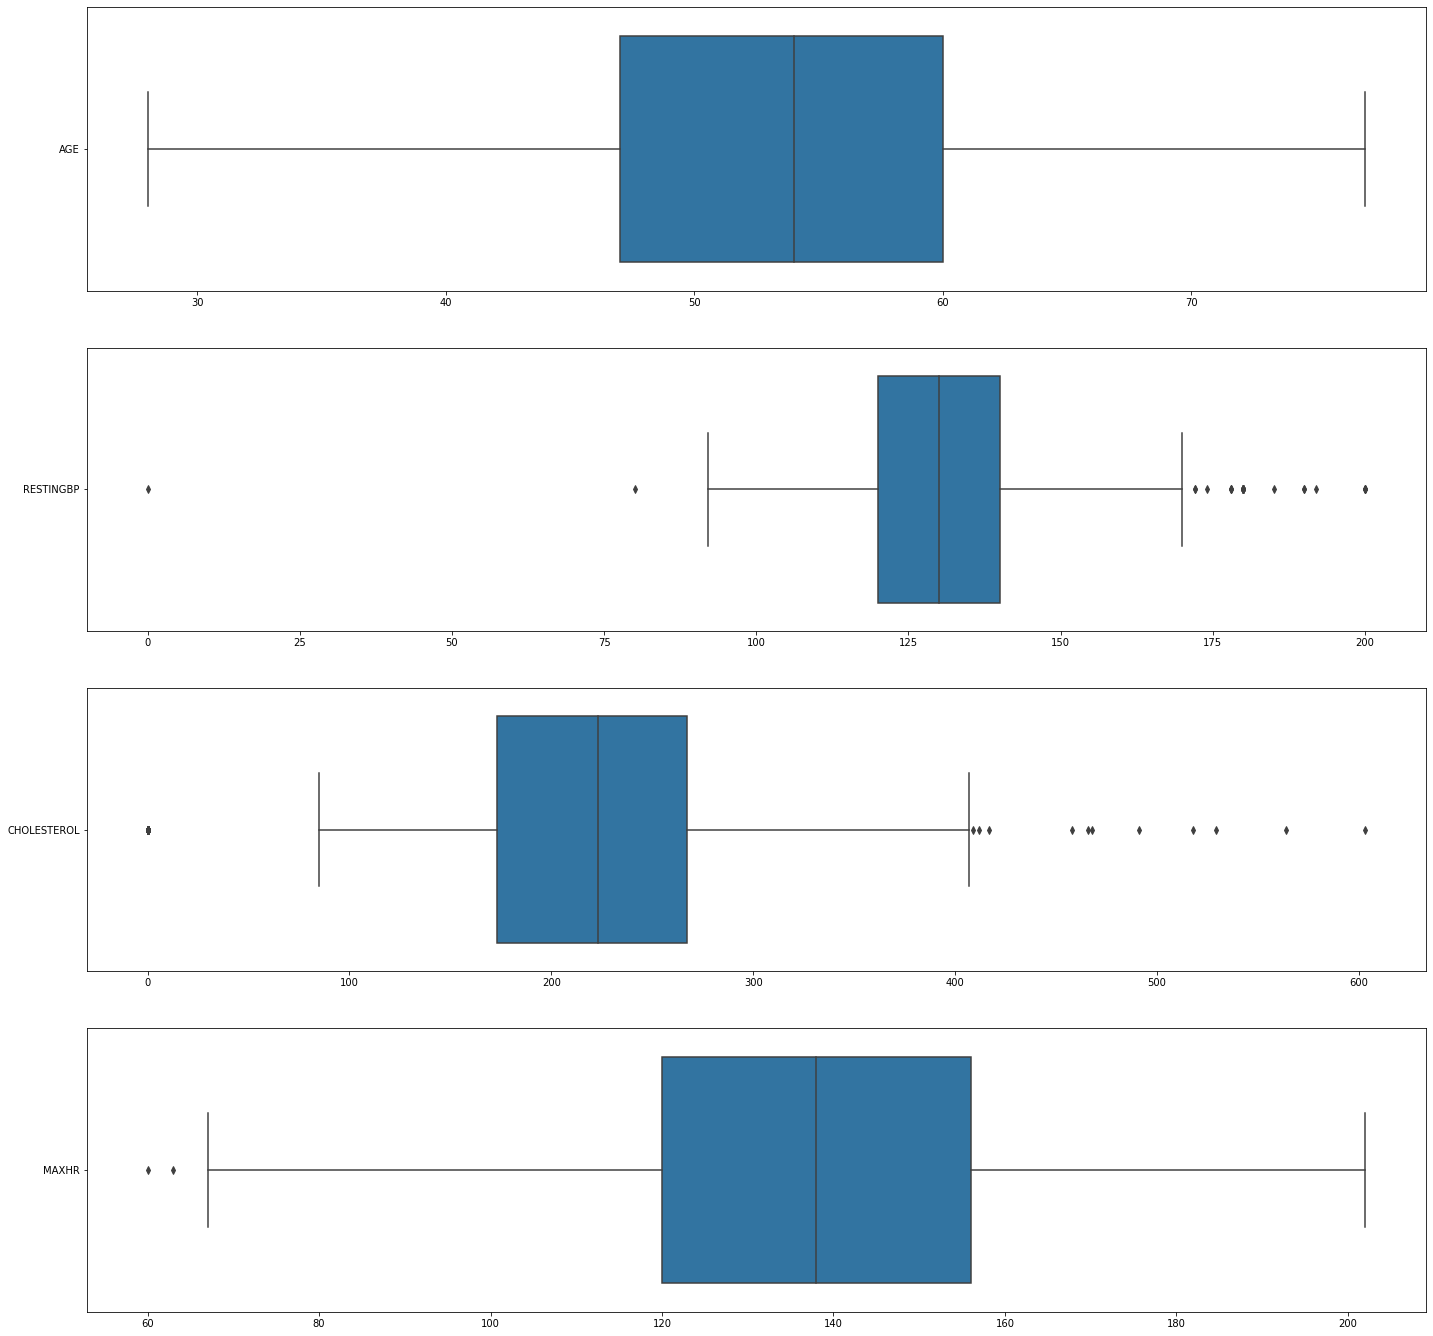

In [11]:
f1,ax1= plt.subplots(4,1,figsize =(24,24))
sb.boxplot(data = heart_AGE, orient ='h',ax=ax1[0])
sb.boxplot(data = heart_RBP, orient ='h',ax=ax1[1])
sb.boxplot(data = heart_CLS, orient ='h',ax=ax1[2])
sb.boxplot(data = heart_MAXHR, orient ='h',ax=ax1[3])


<AxesSubplot:xlabel='HEARTDISEASE', ylabel='count'>

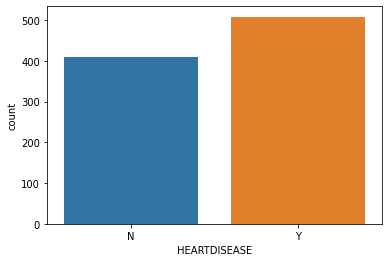

In [12]:
sb.countplot(x='HEARTDISEASE',data =heartC_HD,orient='h')

<AxesSubplot:xlabel='count', ylabel='SEX'>

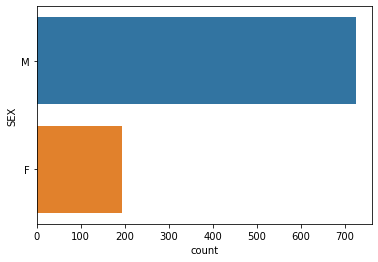

In [13]:
sb.countplot(y ='SEX',data = heart_SEX,orient ='v')

<AxesSubplot:xlabel='count', ylabel='EXERCISEANGINA'>

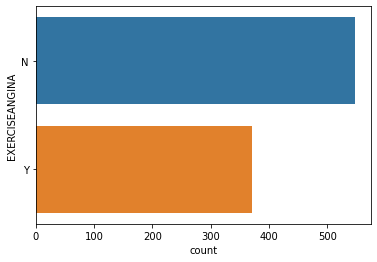

In [14]:
sb.countplot( y ='EXERCISEANGINA',data = heart_EA,orient='v')

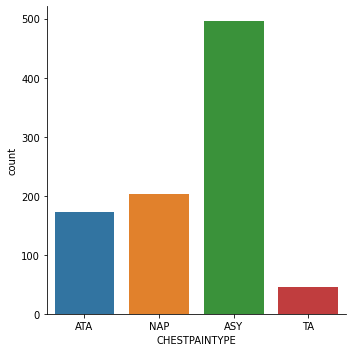

In [15]:
sb.catplot(x='CHESTPAINTYPE',data = heart_CPT,kind='count')

<AxesSubplot:>

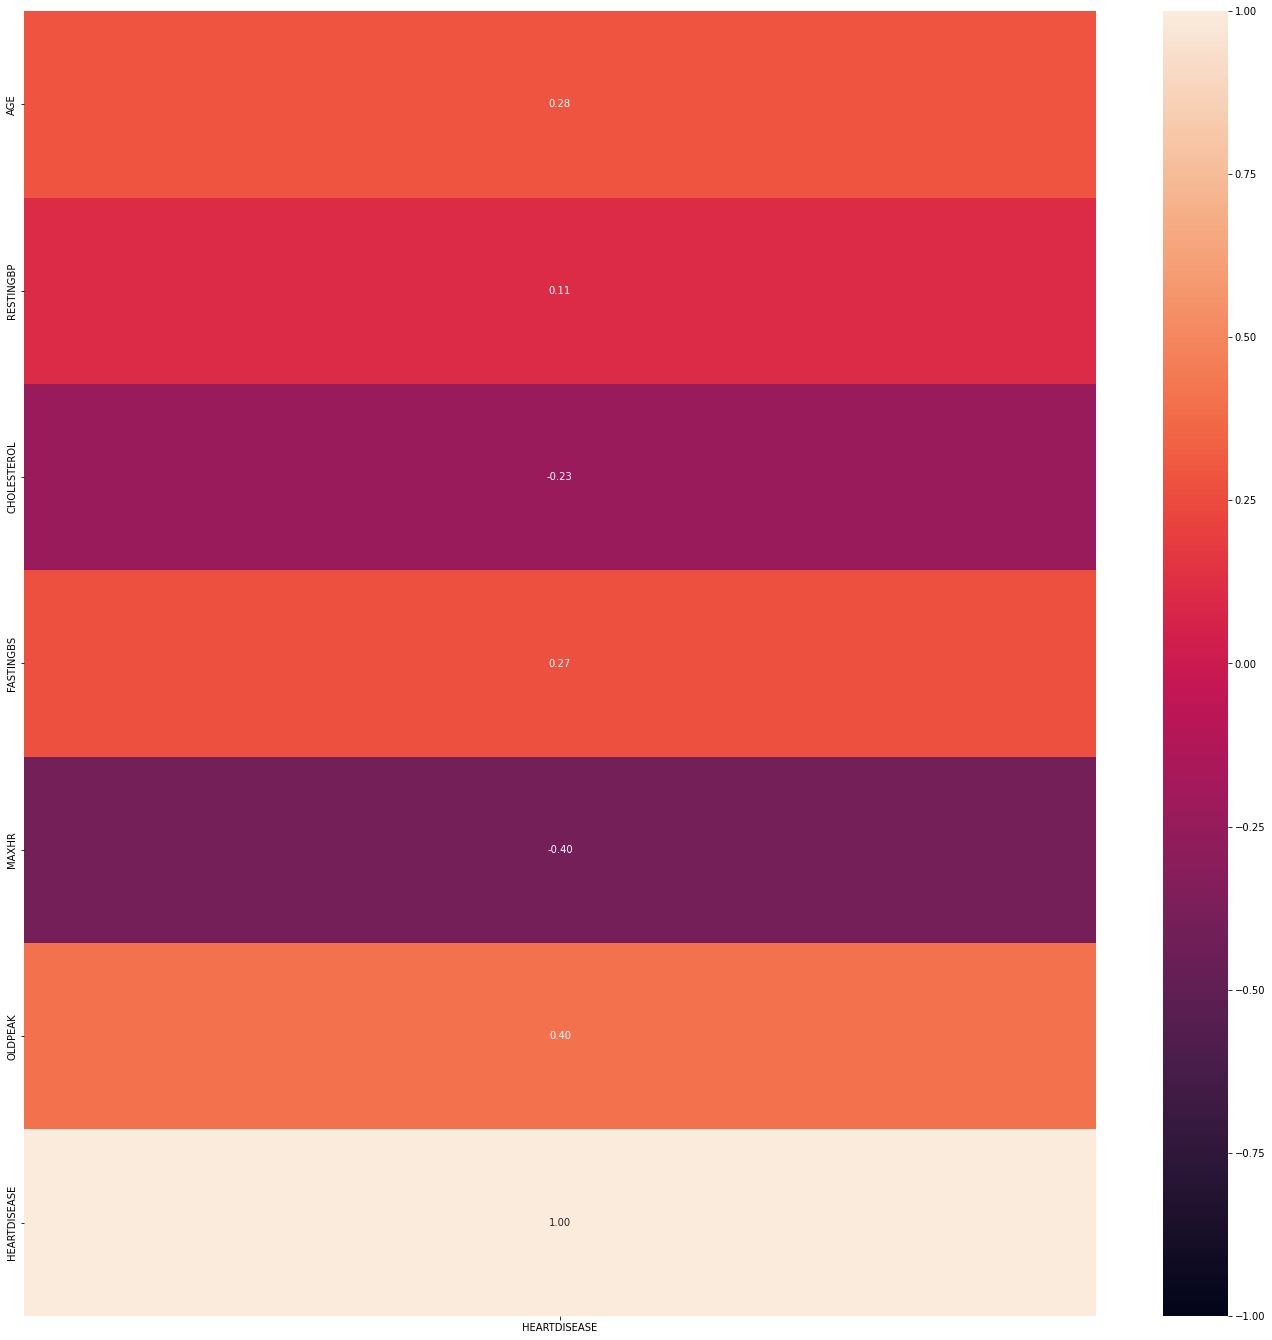

In [16]:
f3 = plt.figure(figsize =(24,24))
sb.heatmap(Heart_df_clean.corr()[['HEARTDISEASE']], vmin = -1, vmax = 1, annot = True, fmt=".2f")

In [17]:
test1 = pd.concat([heartC_HD,heart_SEX],axis=1).reindex(heartC_HD.index)
test2 = pd.concat([heartC_HD,heart_EA],axis=1).reindex(heartC_HD.index)
test3 = pd.concat([heartC_HD,heart_CPT],axis=1).reindex(heartC_HD.index)

<AxesSubplot:xlabel='HEARTDISEASE', ylabel='count'>

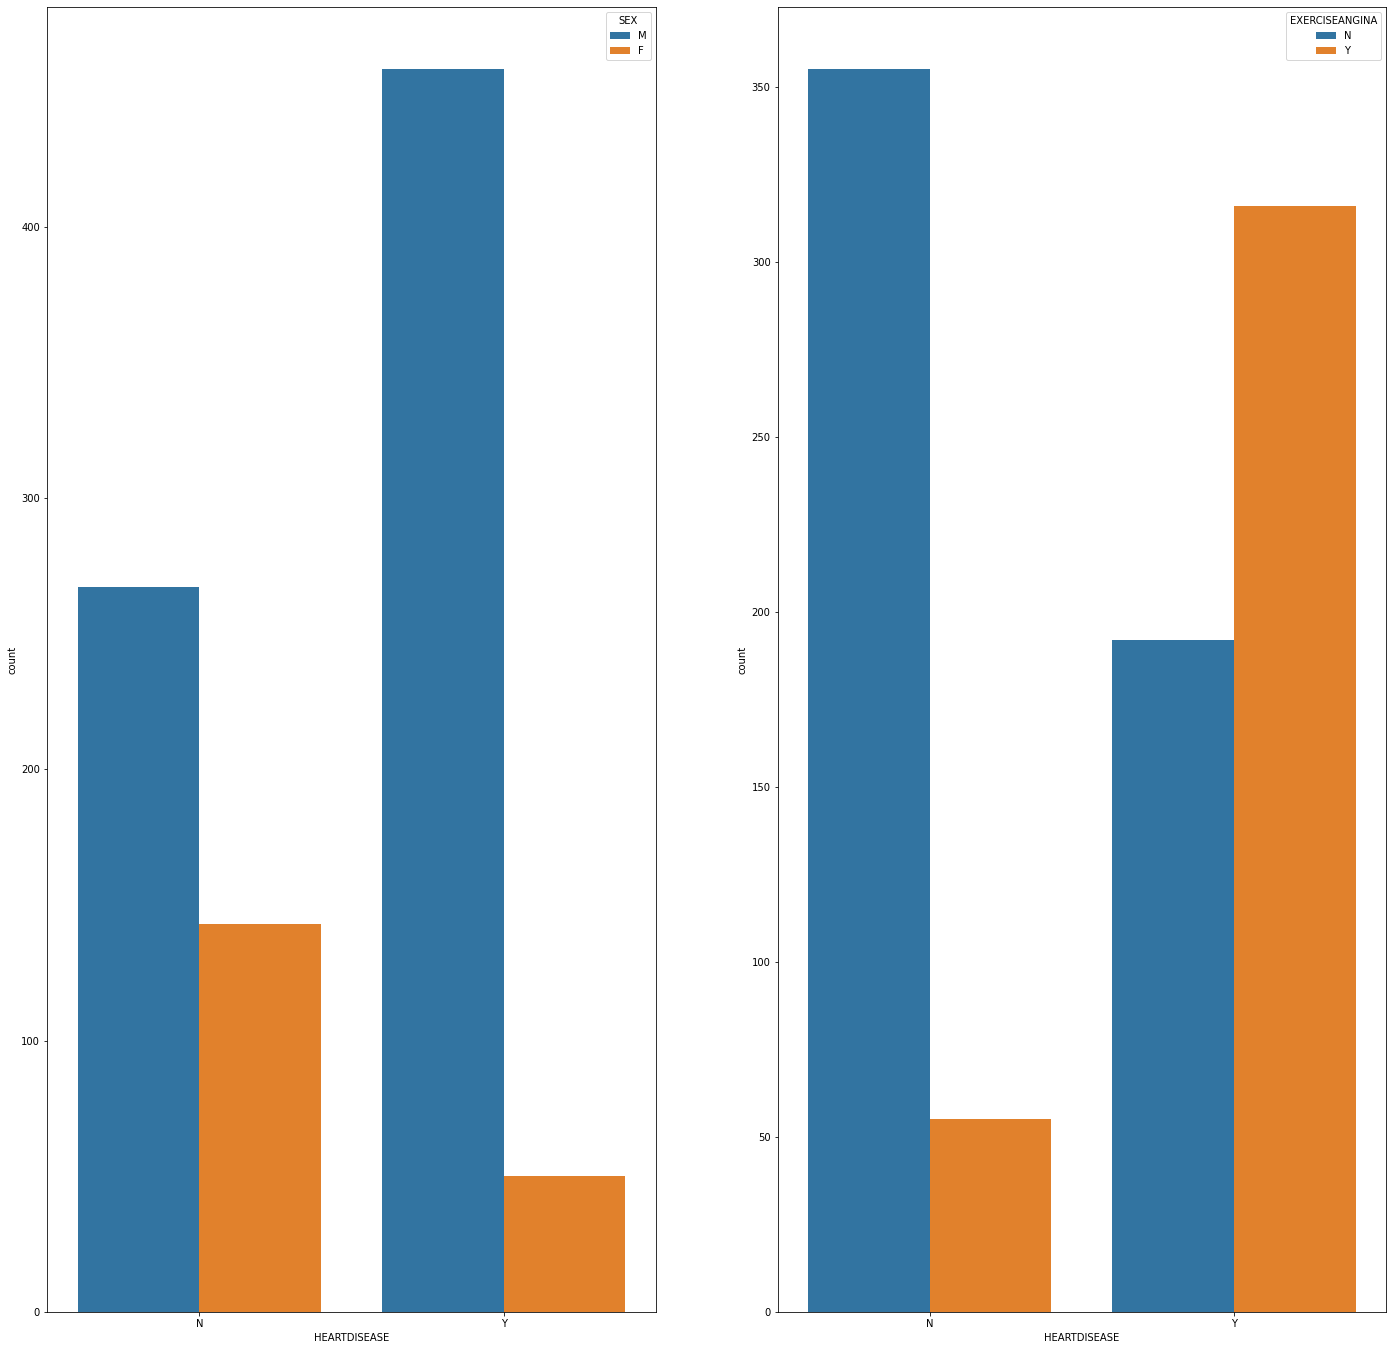

In [18]:
f4,ax2 =plt.subplots(1,2,figsize= (24,24))
sb.countplot(data =test1,x='HEARTDISEASE',hue='SEX',ax=ax2[0])
sb.countplot(data =test2,x='HEARTDISEASE',hue='EXERCISEANGINA',ax=ax2[1])

<AxesSubplot:xlabel='count', ylabel='CHESTPAINTYPE'>

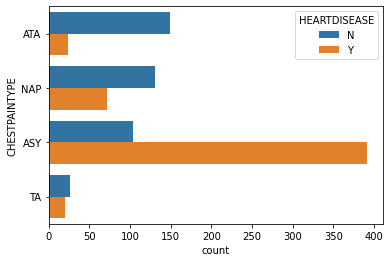

In [19]:
sb.countplot(data =test3,y='CHESTPAINTYPE',hue='HEARTDISEASE',orient='v')

In [20]:
# Machine Learning(model)

In [1]:
from sklearn.tree import plot_tree
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
#-------------[model1,2]----------------------
from sklearn.tree import DecisionTreeClassifier
#-------------[model3,4]----------------------
from sklearn.ensemble import RandomForestClassifier
#-------------[model5,6]------------------------
from tensorflow import keras
from tensorflow.keras.utils import plot_model
from sklearn.preprocessing import StandardScaler

# Model 5 ANN (Artificial Neural Network)

In [21]:
def neural_net_results(X, y):

    y = keras.utils.to_categorical(y, 2)

    X_train, X_val, y_train, y_val = train_test_split(X, y,test_size=0.3,
                                                      random_state=42)

    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_val = scaler.transform(X_val)

    model = keras.Sequential([
        keras.layers.Flatten(input_dim=X_train.shape[1]),
        keras.layers.Dropout(0.1),
        keras.layers.Dense(32, activation='relu'),
        keras.layers.Dropout(0.3),
        keras.layers.Dense(32, activation='relu'),
        keras.layers.Dropout(0.3),
        keras.layers.Dense(2, activation='softmax')
    ])
    
    model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    history = model.fit(X_train, y_train,
              batch_size=10, epochs=70,
              validation_data=(X_val, y_val),
              verbose=0)

    score = np.round(model.evaluate(X_val, y_val, verbose=0)[1], 3)
    print(f'Neural Network score    ========>>> {score}')
    history_plot(history)
    return score
def history_plot(history):

    f11 = plt.figure(figsize=(12, 8))
    plt.plot(history.history['accuracy'], label="Train loss")
    plt.plot(history.history['val_accuracy'], label="Test loss")
    plt.legend()


def plot_nn_model(model):
    plot_model(model, show_shapes=True)
    
models_results = np.zeros(4)


Neural Network score    ========>>> 0.58


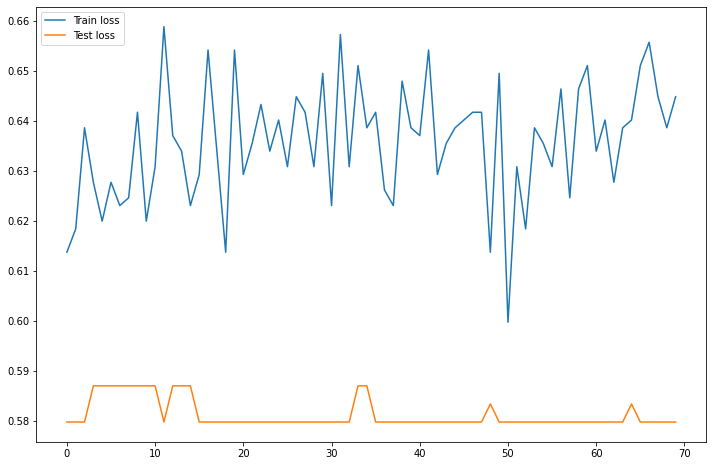

In [22]:
models_results[-1] = neural_net_results(heart_AGE,heart_df['HeartDisease'])

# increase of  epochs layer 

In [23]:
def neural_net_results(X, y):

    y = keras.utils.to_categorical(y, 2)

    X_train, X_val, y_train, y_val = train_test_split(X, y,test_size=0.3,
                                                      random_state=42)

    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_val = scaler.transform(X_val)

    model = keras.Sequential([
        keras.layers.Flatten(input_dim=X_train.shape[1]),
        keras.layers.Dropout(0.1),
        keras.layers.Dense(32, activation='relu'),
        keras.layers.Dropout(0.3),
        keras.layers.Dense(32, activation='relu'),
        keras.layers.Dropout(0.3),
        keras.layers.Dense(2, activation='softmax')
    ])
    
    model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    history = model.fit(X_train, y_train,
              batch_size=10, epochs=200,
              validation_data=(X_val, y_val),
              verbose=0)

    score = np.round(model.evaluate(X_val, y_val, verbose=0)[1], 3)
    print(f'Neural Network score    ========>>> {score}')
    history_plot(history)
    return score
def history_plot(history):

    f11 = plt.figure(figsize=(12, 8))
    plt.plot(history.history['accuracy'], label="Train loss")
    plt.plot(history.history['val_accuracy'], label="Test loss")
    plt.legend()


def plot_nn_model(model):
    plot_model(model, show_shapes=True)
    
models_results = np.zeros(4)


Neural Network score    ========>>> 0.58


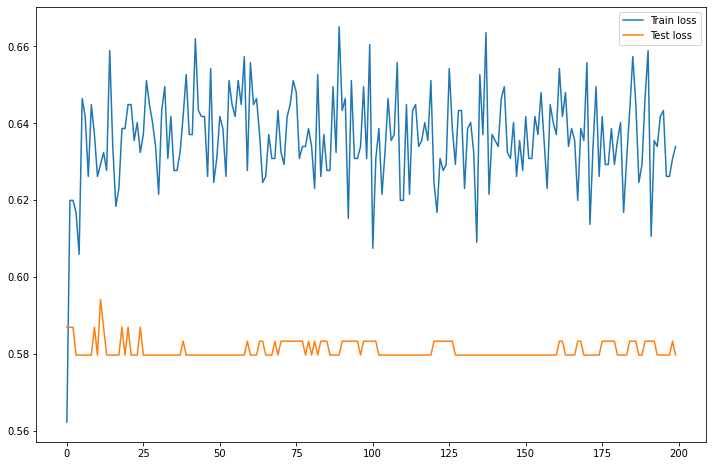

In [24]:
models_results[-1] = neural_net_results(heart_AGE,heart_df['HeartDisease'])

# increase of Batch size

In [25]:
def neural_net_results(X, y):

    y = keras.utils.to_categorical(y, 2)

    X_train, X_val, y_train, y_val = train_test_split(X, y,test_size=0.3,
                                                      random_state=42)

    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_val = scaler.transform(X_val)

    model = keras.Sequential([
        keras.layers.Flatten(input_dim=X_train.shape[1]),
        keras.layers.Dropout(0.1),
        keras.layers.Dense(32, activation='relu'),
        keras.layers.Dropout(0.3),
        keras.layers.Dense(32, activation='relu'),
        keras.layers.Dropout(0.3),
        keras.layers.Dense(2, activation='softmax')
    ])
    
    model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    history = model.fit(X_train, y_train,
              batch_size=30, epochs=70,
              validation_data=(X_val, y_val),
              verbose=0)

    score = np.round(model.evaluate(X_val, y_val, verbose=0)[1], 3)
    print(f'Neural Network score    ========>>> {score}')
    history_plot(history)
    return score
def history_plot(history):

    f11 = plt.figure(figsize=(12, 8))
    plt.plot(history.history['accuracy'], label="Train loss")
    plt.plot(history.history['val_accuracy'], label="Test loss")
    plt.legend()


def plot_nn_model(model):
    plot_model(model, show_shapes=True)
    
models_results = np.zeros(4)


Neural Network score    ========>>> 0.58


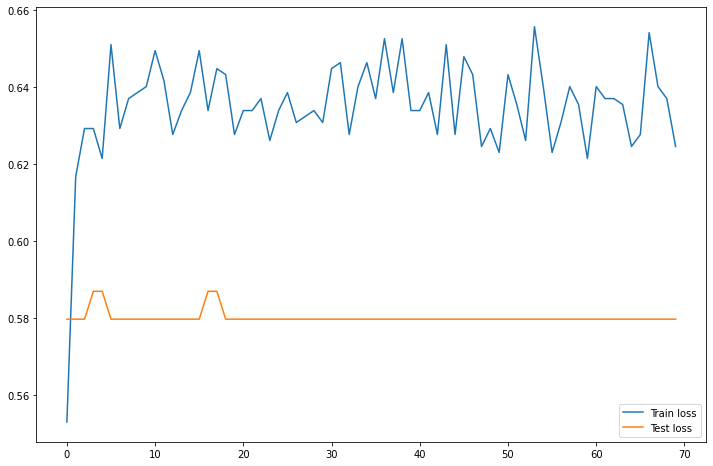

In [26]:
models_results[-1] = neural_net_results(heart_AGE,heart_df['HeartDisease'])

# increase of Hidden layer

In [33]:
def neural_net_results(X, y):

    y = keras.utils.to_categorical(y, 2)

    X_train, X_val, y_train, y_val = train_test_split(X, y,test_size=0.3,
                                                      random_state=42)

    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_val = scaler.transform(X_val)

    model = keras.Sequential([
        keras.layers.Flatten(input_dim=X_train.shape[1]),
        keras.layers.Dropout(0.1),
        keras.layers.Dense(64, activation='relu'),
        keras.layers.Dropout(0.3),
        keras.layers.Dense(64, activation='relu'),
        keras.layers.Dropout(0.3),
        keras.layers.Dense(2, activation='softmax')
    ])
    
    model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    history = model.fit(X_train, y_train,
              batch_size=30, epochs=70,
              validation_data=(X_val, y_val),
              verbose=1)

    score = np.round(model.evaluate(X_val, y_val, verbose=0)[1], 3)
    print(f'Neural Network score    ========>>> {score}')
    history_plot(history)
    return score
def history_plot(history):

    f11 = plt.figure(figsize=(12, 8))
    plt.plot(history.history['accuracy'], label="Train loss")
    plt.plot(history.history['val_accuracy'], label="Test loss")
    plt.legend()


def plot_nn_model(model):
    plot_model(model, show_shapes=True)
    
models_results = np.zeros(4)


Epoch 1/70
22/22 [==============================] - 1s 18ms/step - loss: 0.6740 - accuracy: 0.5826 - val_loss: 0.6619 - val_accuracy: 0.5870
Epoch 2/70
22/22 [==============================] - 0s 6ms/step - loss: 0.6521 - accuracy: 0.6231 - val_loss: 0.6633 - val_accuracy: 0.5797
Epoch 3/70
22/22 [==============================] - 0s 7ms/step - loss: 0.6556 - accuracy: 0.6449 - val_loss: 0.6587 - val_accuracy: 0.5870
Epoch 4/70
22/22 [==============================] - 0s 7ms/step - loss: 0.6584 - accuracy: 0.6231 - val_loss: 0.6603 - val_accuracy: 0.5870
Epoch 5/70
22/22 [==============================] - 0s 7ms/step - loss: 0.6513 - accuracy: 0.6340 - val_loss: 0.6593 - val_accuracy: 0.5870
Epoch 6/70
22/22 [==============================] - 0s 7ms/step - loss: 0.6457 - accuracy: 0.6340 - val_loss: 0.6604 - val_accuracy: 0.5870
Epoch 7/70
22/22 [==============================] - 0s 5ms/step - loss: 0.6503 - accuracy: 0.6355 - val_loss: 0.6613 - val_accuracy: 0.5797
Epoch 8/70
22/22 [=

22/22 [==============================] - 0s 7ms/step - loss: 0.6308 - accuracy: 0.6495 - val_loss: 0.6645 - val_accuracy: 0.5833
Epoch 60/70
22/22 [==============================] - 0s 8ms/step - loss: 0.6443 - accuracy: 0.6417 - val_loss: 0.6638 - val_accuracy: 0.5797
Epoch 61/70
22/22 [==============================] - 0s 6ms/step - loss: 0.6389 - accuracy: 0.6449 - val_loss: 0.6649 - val_accuracy: 0.5797
Epoch 62/70
22/22 [==============================] - 0s 7ms/step - loss: 0.6402 - accuracy: 0.6246 - val_loss: 0.6654 - val_accuracy: 0.5797
Epoch 63/70
22/22 [==============================] - 0s 8ms/step - loss: 0.6356 - accuracy: 0.6449 - val_loss: 0.6640 - val_accuracy: 0.5797
Epoch 64/70
22/22 [==============================] - 0s 7ms/step - loss: 0.6530 - accuracy: 0.6215 - val_loss: 0.6646 - val_accuracy: 0.5833
Epoch 65/70
22/22 [==============================] - 0s 8ms/step - loss: 0.6421 - accuracy: 0.6511 - val_loss: 0.6644 - val_accuracy: 0.5833
Epoch 66/70
22/22 [======

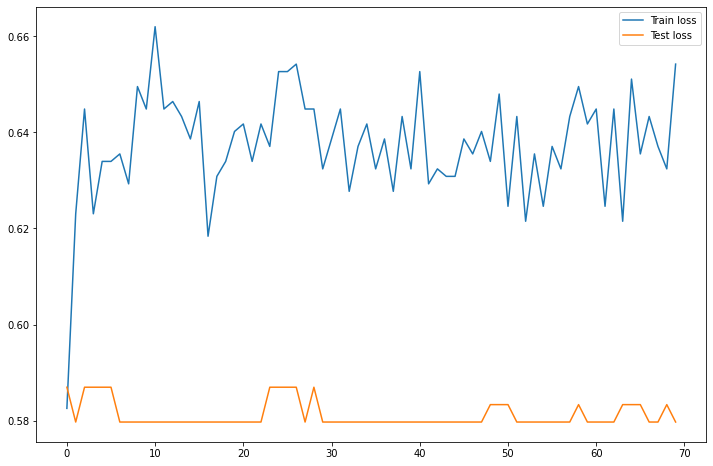

In [34]:
models_results[-1] = neural_net_results(heart_AGE,heart_df['HeartDisease'])